# Loan Approval Prediction
## Data Exploration & Data Visualizations

Type: Binary Classification Loan approval prediction

Given with dataset consisting of details of applicants for loan and status whether the loan application is approved or not. 

Basis on the a binary classification model is to be created with maximum accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Financial-Analytics-Loan-Approval-Prediction/main/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 1.Basic Data Exploration

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Conclusions:
1. 614 Obs & 13 features
2. Loan_ID is an unnecessary feature.
3. Challenge1 - Missing values present in the dataset.
4. Challenge2 - values of 'Dependents' are numerical type but its datatype is object. 

### Challenge1: Missing values

In [6]:
# Columns where missing values present
data.isnull().any() 

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
# No of missing values under each feature
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

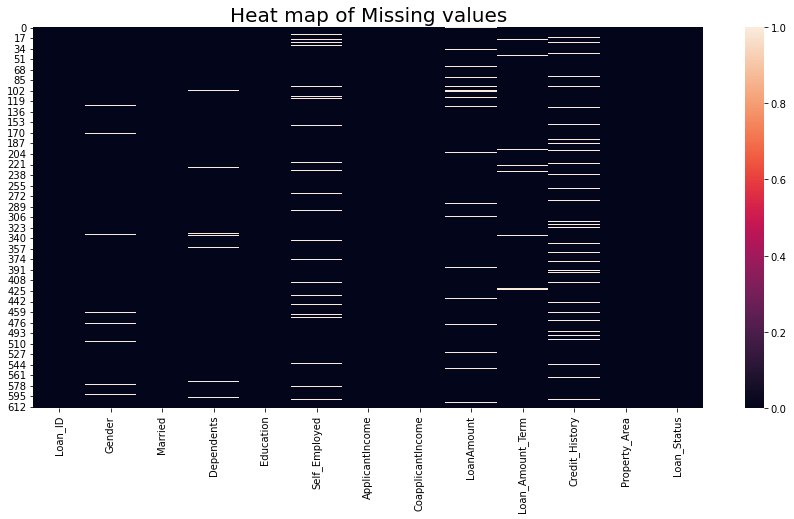

In [8]:
# Heatmap of missing values
plt.figure(figsize=(15,7))
sns.heatmap(data.isnull())
plt.title("Heat map of Missing values",fontsize = 20)
plt.show()

### Question Arises that Whether this missing values affect our target variable 'Loan Status' or not.
<b>Relationship between missing values and Loan Status.</b>

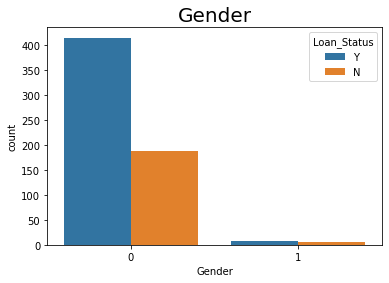

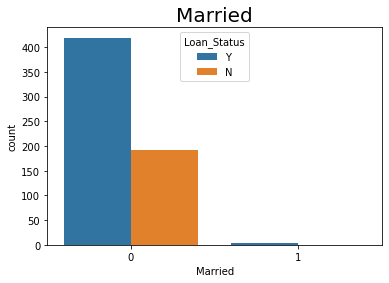

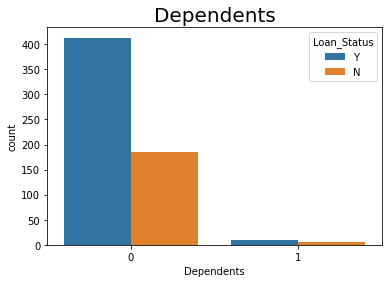

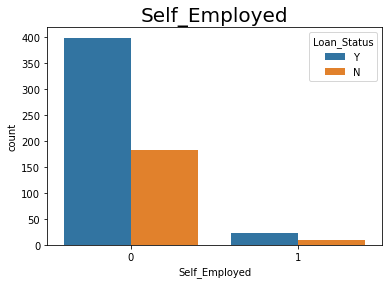

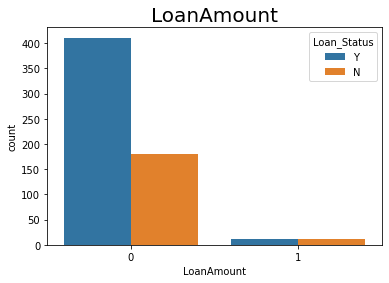

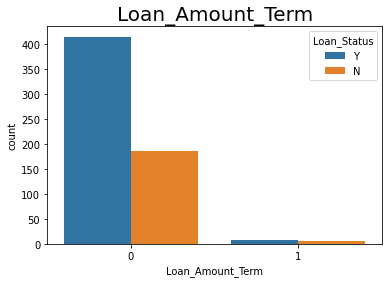

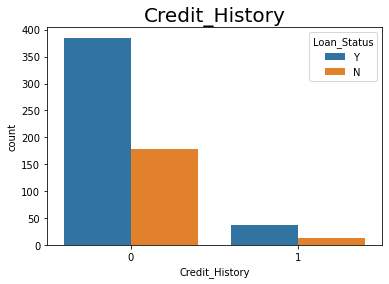

In [9]:
df = data.copy()
for var in df.columns:
    if df[var].isnull().any() == True:
        df[var] = np.where(df[var].isnull(),1,0)
        sns.countplot(x = var,data=df,hue='Loan_Status')
        plt.title(var, fontsize = 20)
        plt.show()


#### Conclusions
1. No Coclusive evident

### Challenge2: 'Dependents' is numerical type but it's showing it's a object type (Why?)

In [10]:
# Showing the unique elements of 'Dependents'
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
# Replace '3+' values to 3
data['Dependents'].replace('3+',3, inplace =True)

In [12]:
# Change the datatype of Dependents
data['Dependents']= data['Dependents'].astype('float')

#### Conclusions:
1. It has a 3+ value which is not coming under numerical type that's why it's showing it's a object type.
2. <b>Task:</b> Replace these values to 3. and convert the datatype of Dependents feature.

## 2. Data Visualizations
### Try to find the relationship between features and dependent variables

### 2.1 Categorical 

In [13]:
df = data.copy()
categorical_var = [var for var in df.columns if df[var].dtype == 'O']
categorical_var

['Loan_ID',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [14]:
# Overall Information about the categorical variale
df[categorical_var].describe()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,LP001002,Male,Yes,Graduate,No,Semiurban,Y
freq,1,489,398,480,500,233,422


In [15]:
# Printing all the unique values of the features
print('The unique values of categorical variables are:')
for var in categorical_var:
    if var != 'Loan_ID':
        print('{}:{}'.format(var,data[var].unique()))

The unique values of categorical variables are:
Gender:['Male' 'Female' nan]
Married:['No' 'Yes' nan]
Education:['Graduate' 'Not Graduate']
Self_Employed:['No' 'Yes' nan]
Property_Area:['Urban' 'Rural' 'Semiurban']
Loan_Status:['Y' 'N']


In [16]:
# Overall information about value counts
for var in categorical_var:
    if var != 'Loan_ID':
        print(df[var].value_counts())
        print(df[var].value_counts(normalize=True))
        print('-----------------------------')

Male      489
Female    112
Name: Gender, dtype: int64
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
-----------------------------
Yes    398
No     213
Name: Married, dtype: int64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
-----------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
-----------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
-----------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
-----------------------------
Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64
-----------------------------


In [17]:
# Bivariate Analysis
for var in categorical_var:
    if var != 'Loan_ID' and var !='Loan_Status':
        print(pd.crosstab(df[var],df['Loan_Status']))
        print('------------------------')

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339
------------------------
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
------------------------
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
------------------------
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
------------------------
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
------------------------


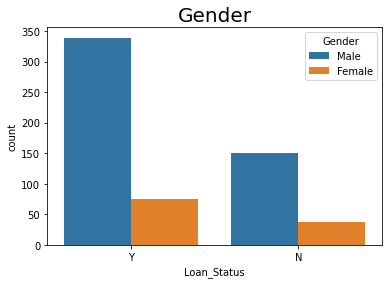

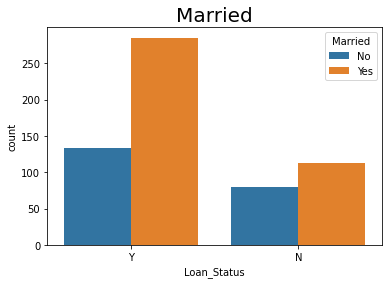

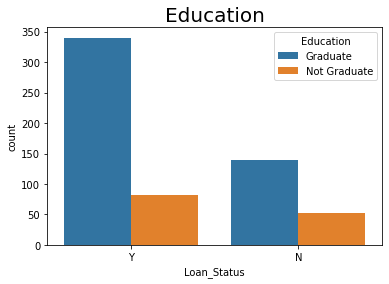

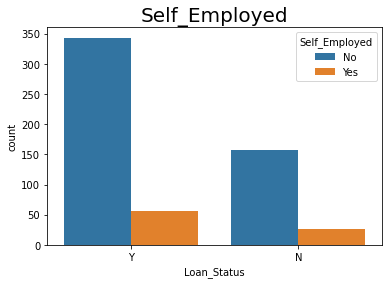

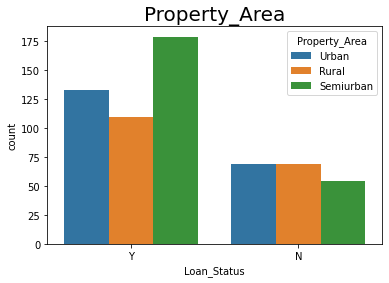

In [18]:
# Visualize the above table
for var in categorical_var:
    if var != 'Loan_ID' and var !='Loan_Status':
        sns.countplot(x='Loan_Status', data=df ,hue=var)
        plt.title(var,fontsize=20)
        plt.show()

#### Conclusions:
1. Male are getting more loan approval.
2. Married persons are getting more loan approval.
3. Graduates are more prone to loan approval.
4. No self employed person are getting more loan approval.
5. Semiurban people are getting more loan approval whereas urban & rural people are almost equal.

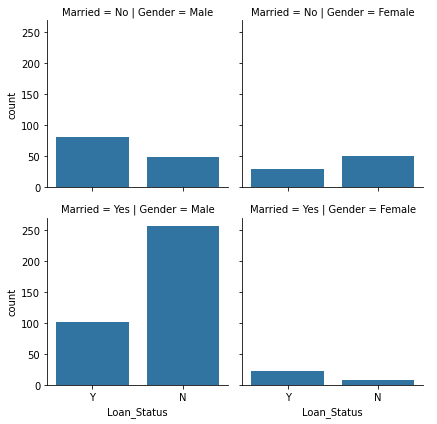

In [19]:
# Visualization by using FacetGrid
g = sns.FacetGrid(data=df, col='Gender',row='Married')
g.map_dataframe(sns.countplot, x='Loan_Status')
g.add_legend()
plt.show()

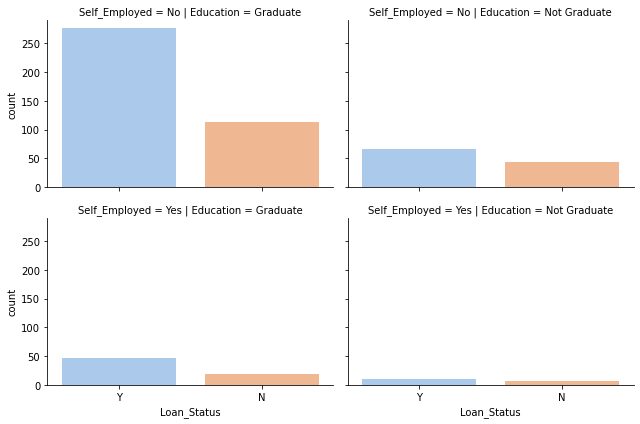

In [20]:
# Visualization by using FacetGrid
g = sns.FacetGrid(data=df, col='Education',row='Self_Employed',height =3, aspect=1.5)
g.map_dataframe(sns.countplot, x='Loan_Status',palette='pastel')
plt.show()

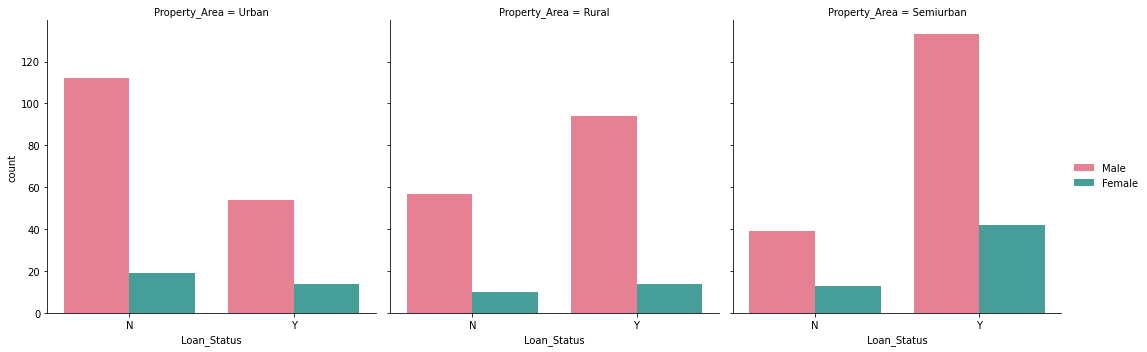

In [21]:
# Visualization by using FacetGrid
g = sns.FacetGrid(data=df, col='Property_Area',height = 5)
g.map_dataframe(sns.countplot, x='Loan_Status',hue='Gender',palette='husl')
g.add_legend()
plt.show()

### 2.2 Numerical

In [22]:
# List of Numerical variables
df = data.copy()
numerical_var = [var for var in df.columns if var not in categorical_var]
numerical_var

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [23]:
df[numerical_var].head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,NaN,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0


In [24]:
df[numerical_var].describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
pd.pivot_table(df,index=['Loan_Status'],aggfunc = 'median') # By default mean

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term
Loan_Status,,,,,,
N,3833.5,268.0,1.0,0.0,129.0,360.0
Y,3812.5,1239.5,1.0,0.0,126.0,360.0


In [26]:
df.groupby('Loan_Status')[numerical_var].mean()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,
N,0.752688,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,0.767554,5384.068720,1504.516398,144.294404,341.072464,0.981818


<AxesSubplot:xlabel='Dependents', ylabel='count'>

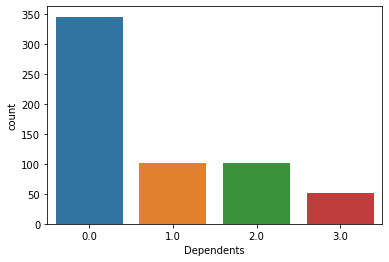

In [27]:
sns.countplot(x = 'Dependents',data = df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

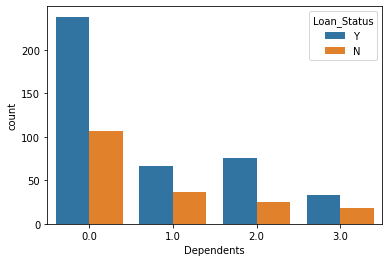

In [28]:
sns.countplot(x = 'Dependents',data = df,hue = 'Loan_Status')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

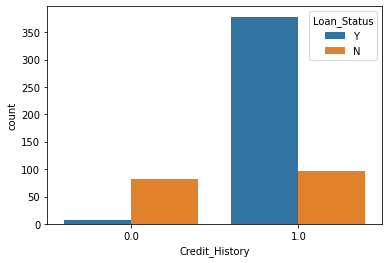

In [29]:
sns.countplot(x = 'Credit_History',data = df,hue = 'Loan_Status')

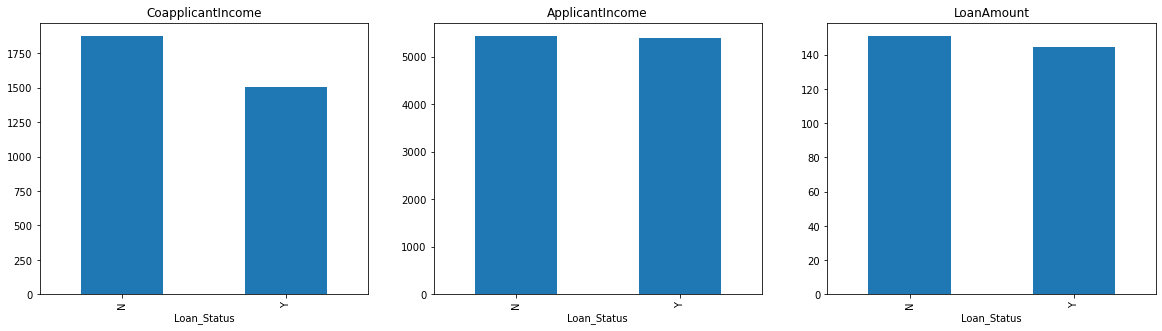

In [30]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
df.groupby("Loan_Status")['CoapplicantIncome'].mean().plot(kind = 'bar')
plt.title('CoapplicantIncome')

plt.subplot(1,3,2)
df.groupby("Loan_Status")['ApplicantIncome'].mean().plot(kind = 'bar')
plt.title('ApplicantIncome')

plt.subplot(1,3,3)
df.groupby("Loan_Status")['LoanAmount'].mean().plot(kind = 'bar')
plt.title('LoanAmount')

plt.show()

### Outliers

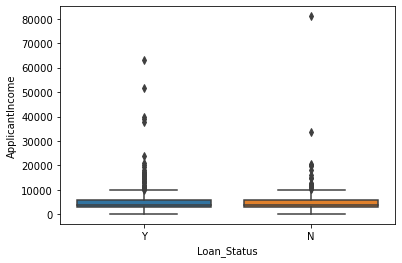

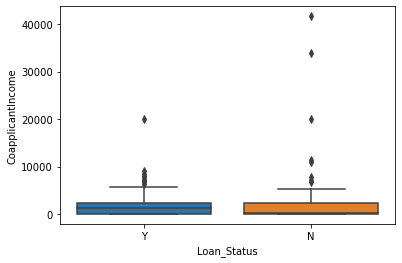

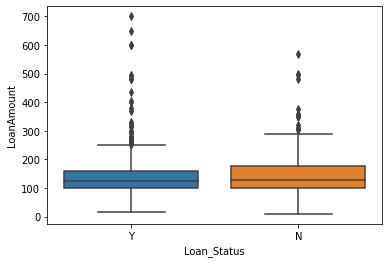

In [31]:
continuous_var = [var for var in numerical_var if var not in ['Dependents','Credit_History','Loan_Amount_Term']]
for var in continuous_var:
    sns.boxplot(x = 'Loan_Status',y = var,data = df)
    plt.show()

### Normalize Behaviour of Continuous variable

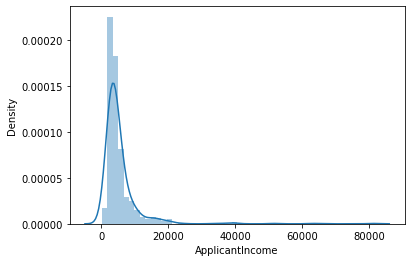

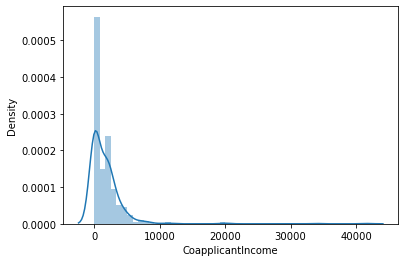

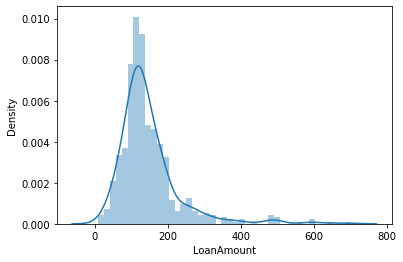

In [32]:
for var in continuous_var:
    sns.distplot(df[var],kde=True)
    plt.show()